Problem Statement: Given an undirected graph with V vertices and E edges, check whether it contains any cycle or not. 

Examples:

Example 1:
Input:
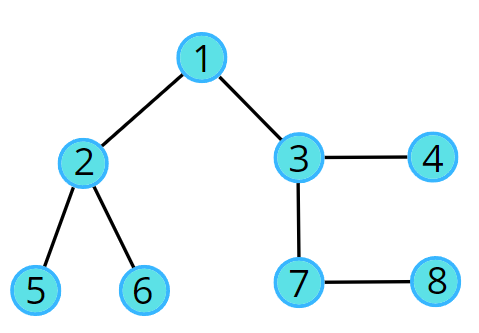

V = 8, E = 7

Output:  0

Explanation: No cycle in the given graph.

Example 2:

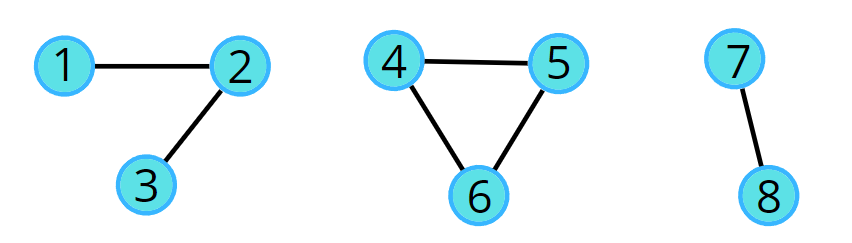

Input:
V = 8, E = 6


Output: 1 

Explanation: 4->5->6->4 is a cycle.
Solution
Disclaimer: Don't jump directly to the solution, try it out yourself first.

Intuition:
The cycle in a graph starts from a node and ends at the same node. So we can think of two algorithms to do this, in this article we will be reading about the BFS, and in the next, we will be learning how to use DFS to check. 

Breadth First Search, BFS is a traversal technique where we visit the nodes level-wise, i.e., it visits the same level nodes simultaneously, and then moves to the next level. 

The intuition is that we start from a node, and start doing BFS level-wise, if somewhere down the line, we visit a single node twice, it means we came via two paths to end up at the same node. It implies there is a cycle in the graph because we know that we start from different directions but can arrive at the same node only if the graph is connected or contains a cycle, otherwise we would never come to the same node again.  

Approach:
Initial configuration:
Queue: Define a queue and insert the source node along with parent data (<source node, parent>). For example, (2, 1) means 2 is the source node and 1 is its parent node.
Visited array: an array initialized to 0 indicating unvisited nodes.  
The algorithm steps are as follows:

For BFS traversal, we need a queue data structure and a visited array. 
Push the pair of the source node and its parent data (<source, parent>) in the queue, and mark the node as visited. The parent will be needed so that we don’t do a backward traversal in the graph, we just move frontwards. 
Start the BFS traversal, pop out an element from the queue every time and travel to all its unvisited neighbors using an adjacency list.
Repeat the steps either until the queue becomes empty, or a node appears to be already visited which is not the parent, even though we traveled in different directions during the traversal, indicating there is a cycle.
If the queue becomes empty and no such node is found then there is no cycle in the graph.
A graph can have connected components as well. In such cases, if any component forms a cycle then the graph is said to have a cycle. We can follow the algorithm for the same:



Consider the following graph and its adjacency list.
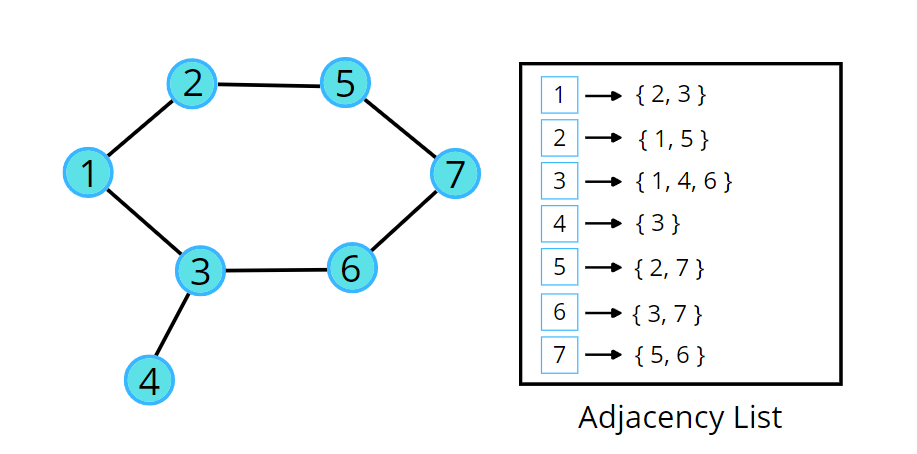


Consider the following illustration to understand the process of detecting a cycle using BFS traversal.

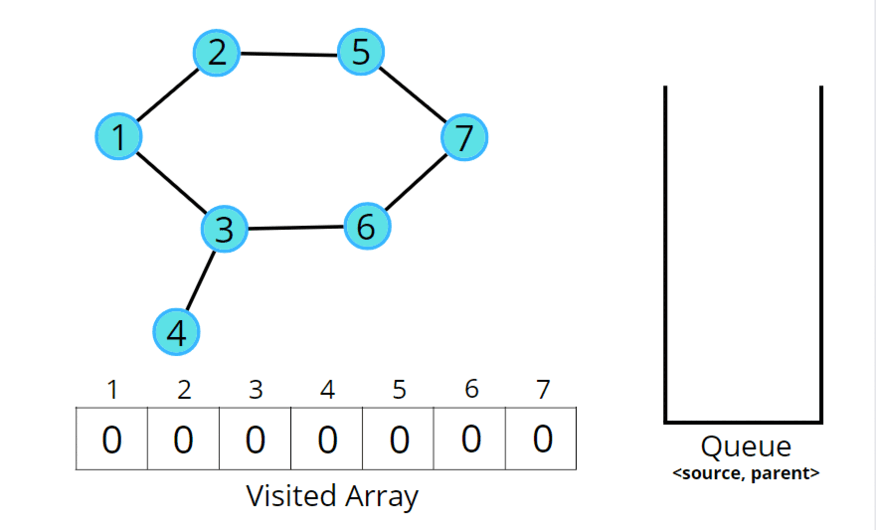

Code:



In [1]:
from collections import deque

class Solution:
    def detectCycle(self,adj,visited,root):
        q = deque([(root,-1)])
        visited[root] = True
        while q:
            node,parent = q.popleft()
            for n in adj[node]:
                if not visited[n]:
                    q.append((n,node))
                    visited[n] = True
                elif parent!=n:
                    return True # Meaning some other node has already visited the current node which resulting in the cycle
        return False
    
    def isCycle(self,v,adj):
        visited = [False]*v
        for i in range(v):
            if not visited[i]:
                if self.detectCycle(adj,visited,i):
                    return True
        return False

if __name__ == "__main__":
# Adjacency List representation
    adjacency_list = {
        1: [2, 3],
        2: [1, 5],
        3: [1, 4, 6],
        4: [3],
        5: [2, 7],
        6: [3, 7],
        7: [5, 6]
    }

    # Convert the adjacency list to a list of lists
    adj = [[] for _ in range(max(adjacency_list.keys()) + 1)]
    for node, neighbors in adjacency_list.items():
        for neighbor in neighbors:
            adj[node].append(neighbor)

    sol = Solution()
    ans = sol.isCycle(len(adj), adj)
    print(1 if ans else 0)


1


In [2]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.adj_list = [[] for _ in range(vertices)]

    def add_edge(self, u, v):
        self.adj_list[u].append(v)
        self.adj_list[v].append(u)

    def is_cyclic_util(self, v, visited, parent):
        visited[v] = True
        for i in self.adj_list[v]:
            if not visited[i]:
                if self.is_cyclic_util(i, visited, v):
                    return True
            elif parent != i:
                return True
        return False

    def is_cyclic(self):
        visited = [False] * self.V
        for i in range(self.V):
            if not visited[i]:
                if self.is_cyclic_util(i, visited, -1):
                    print(visited)
                    return True
        return False


# Example usage:
g = Graph(4)
g.add_edge(0, 1)
g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(3, 0)

if g.is_cyclic():
    print("Graph contains a cycle")
else:
    print("Graph does not contain a cycle")


[True, True, True, True]
Graph contains a cycle
